Installare le due librerie indicate sotto

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib                 # pip install cdlib #
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality             # pip install pquality #
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
path = "../Dataset FFF/"

In [3]:
path_graph = '../Dataset FFF/Graph_data/'

In [4]:
#codice matt che non va
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [16]:
###QUESTO CODICE FUNZIONA

G = nx.path_graph('Dataset FFF/Graph_data/')
nx.write_graphml_lxml(G, "Real_Network.graphml")


In [5]:
community_path = "../Dataset FFF/Community_task/"

In [21]:
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
        fontsize = 15
        
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
plt.yticks(fontsize=fontsize, alpha=1)
plt.xticks(fontsize=fontsize, alpha=1)
plt.xlabel("Size", fontsize=fontsize)
plt.ylabel("Internal Edge Density", fontsize=fontsize)
plt.title(" Scatter Plot", fontsize=fontsize)
plt.legend(labels, fontsize=fontsize)
plt.grid(axis='both', alpha=.3)
plt.xscale("log")
plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

NameError: name 'fontsize' is not defined

In [22]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [16]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

# 1 - Louvain

Parametri ottimizzati con grid_search

In [6]:
res_df = {"randomize": [], "resolution":[], "AID": [], "IED": [], "Conductance":[], "Modularity": [], "N_Community": [], "Max_Dim_Community": []}


In [7]:
for j in [True, False]:
    for i in [x/10 for x in range(0, 10)]:   
        print(f"> Louvain opt for resolution = {i} and randomize = {j}")
        
        res_df["randomize"].append(j)
        res_df["resolution"].append(i)
        
        louvain_coms = cdlib.algorithms.louvain(G, weight = "Count", resolution=i, randomize=j)
        res_df["AID"].append(louvain_coms.average_internal_degree().score)
        res_df["IED"].append(louvain_coms.internal_edge_density().score)
        res_df["Conductance"].append(louvain_coms.conductance().score)
        res_df["Modularity"].append(louvain_coms.newman_girvan_modularity().score)
        res_df["N_Community"].append(len(louvain_coms.communities))
        max_com_len = 0
        for com in louvain_coms.communities:
            if len(com) > max_com_len:
                max_com_len = len(com)
        res_df["Max_Dim_Community"].append(max_com_len)
        
        print("************ ------------------ *******")
final_df = pd.DataFrame(res_df)
final_df.to_csv(community_path+"louvain_grid_result.csv", index=False)

> Louvain opt for resolution = 0.0 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.1 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.2 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.3 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.4 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.5 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.6 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.7 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.8 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.9 and randomize = True
************ ------------------ *******
> Louvain opt for resolution = 0.0 and r

In [8]:
final_df = pd.read_csv(community_path+"louvain_grid_result.csv")

In [9]:
final_df.loc[[1, 2, 3, 4, 5, 6, 7, 8, 9]]

,randomize,resolution,AID,IED,Conductance,Modularity,N_Community,Max_Dim_Community
1,True,0.1,0.504575,0.355300,0.870952,0.062426,2894,10164
2,True,0.2,0.678217,0.392910,0.865276,0.226933,3264,7843
3,True,0.3,0.675309,0.390248,0.864662,0.188061,3131,8681
4,True,0.4,0.763231,0.431756,0.859154,0.288756,3346,6701
5,True,0.5,2.112048,0.840788,0.541745,0.449458,704,6219
6,True,0.6,2.490662,0.872518,0.505231,0.471157,698,5028
7,True,0.7,2.328465,0.881916,0.536807,0.461171,790,4082
8,True,0.8,2.471085,0.860479,0.552324,0.450601,864,4739
9,True,0.9,4.115537,0.630107,0.111787,0.486845,133,5052


Ottimizzazione con randomsearch

In [10]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
parameters = [resolution]

In [11]:
louvain_coms, scoring = ensemble.grid_search(graph=G, method=algorithms.louvain,
                                                       parameters=parameters,
                                                       quality_score=evaluation.newman_girvan_modularity, aggregate=max)

In [12]:
print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(louvain_coms.communities, louvain_coms.method_parameters, scoring))

Communities:
 [['fridaysforfuture', 'climatecrisis', ' climateactionnow', ' uprootthesystem', ' mindthegap', ' globalwarming', ' climatejustice', ' peoplenotprofit', 'climatestrike', ' humanity', ' endfossilfuels', ' digitalstrike', ' climatebreakdown', 'climatejustice', ' systemchange', 'climateaction', ' savesoil', 'climatechange', ' ilmastolakko', ' nytonpakko', 'climateactionnow', 'fridayforfuture', ' ireland', ' standwithukraine️', ' conservation', 'peoplenotprofit', 'stopeacop', ' twiff', '1point5', ' netzero', 'climateemergency', ' g7', ' noemptypromises', ' stopfundingfossilfuel', ' thereisnoplanetb', ' belgium', ' stopeacop', 'restoreourearth', ' consciousplanet', ' helsinki', ' climatefinance', ' heatwaves', ' ecocide', 'savecongorainforest', ' stockholm50', ' arctic', ' ilmastokriisi', ' plasticfree', 'globalclimatestrike', ' biodiversityday', 'schoolstrike', 'uprootthesystem', ' makeparisreal', ' socialjustice', ' climatecriminals', ' auspol', ' ausvotes', ' environmentalju

In [13]:
louvain_coms = cdlib.algorithms.louvain(G, weight = "Count", resolution=0.9)

In [14]:
with open(community_path+'louvain.pickle', 'wb') as f:
    pickle.dump(louvain_coms, f)

In [18]:
print(print_bold_str("Average Internal Degree:"), louvain_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), louvain_coms.internal_edge_density())
print(print_bold_str("Conductance:"), louvain_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), louvain_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), louvain_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), louvain_coms.modularity_density())
print(print_bold_str("Z Modularity:"), louvain_coms.z_modularity())
print(print_bold_str("Triangle Partecipation Ratio:"), louvain_coms.triangle_participation_ratio())

print(print_bold_str("N_Community:"), len(louvain_coms.communities))

max_com_len = 0
for com in louvain_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)   

Average Internal Degree: FitnessResult(min=1.0, max=50.63281958295558, score=3.3543273255100408, std=6.695364830825016)
Internal Edge Density: FitnessResult(min=0.0038061811996103812, max=1.0, score=0.6211737899151399, std=0.32039482961085824)
Conductance: FitnessResult(min=0.0, max=0.5384615384615384, score=0.17160571027999968, std=0.18262745115443188)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.520012366202634, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.47541037516420154, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=321.6550180144551, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=1.0500992411076053, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=1.0, score=0.16611483837509616, std=0.3295860099877776)
N_Community: 156
Max_Dim_Community: 5572


In [19]:
louvain_tuple = [tuple(x) for x in louvain_coms.communities]


In [20]:
# Analizziamo la cardinalità delle communities
plot_communities_dimentions(louvain_tuple)

NameError: name 'plot_communities_dimentions' is not defined

In [28]:
results = pquality.pquality_summary(G, louvain_tuple)
results['Indexes']

,min,max,avg,std
Index,,,,
Internal Density,0.500000,2.000000,0.916667,0.629153
Edges inside,2.000000,5.000000,3.000000,1.224745
Average Degree,1.333333,2.000000,1.708333,0.297560
FOMD,0.200000,0.500000,0.383333,0.125831
TPR,0.000000,0.000000,0.000000,0.000000
Expansion,0.500000,1.000000,0.875000,0.216506
Cut Ratio,0.050000,0.111111,0.083838,0.022018
Conductance,0.250000,0.428571,0.336310,0.063205
Normalized Cut,0.312500,0.514286,0.428392,0.081407


In [29]:
results['Modularity']

,value
Index,
Modularity (no overlap),0.378086


# 2 - Label Propagation

In [30]:
labelprop_coms = algorithms.label_propagation(G)

In [31]:
print(print_bold_str("Average Internal Degree:"), labelprop_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), labelprop_coms.internal_edge_density())
print(print_bold_str("Conductance:"), labelprop_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), labelprop_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), labelprop_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), labelprop_coms.modularity_density())
print(print_bold_str("Z Modularity:"), labelprop_coms.z_modularity())
print(print_bold_str("Triangle Partecipation Ratio:"), labelprop_coms.triangle_participation_ratio())

print(print_bold_str("N_Community:"), len(labelprop_coms.communities))

max_com_len = 0
for com in labelprop_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len) 

Average Internal Degree: FitnessResult(min=1.0, max=2.25, score=1.3125, std=0.5412658773652742)
Internal Edge Density: FitnessResult(min=0.32142857142857145, max=1.0, score=0.8303571428571428, std=0.29383004771257737)
Conductance: FitnessResult(min=0.25, max=0.5, score=0.4375, std=0.10825317547305482)
Erdos Renyi Modularity: FitnessResult(min=None, max=None, score=0.32600732600732596, std=None)
Newman Girvan Modularity: FitnessResult(min=None, max=None, score=0.1851851851851852, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=1.5, std=None)
Z Modularity: FitnessResult(min=None, max=None, score=0.37062465833055075, std=None)
Triangle Partecipation Ratio: FitnessResult(min=0.0, max=0.0, score=0.0, std=0.0)
N_Community: 4
Max_Dim_Community: 8


In [32]:
with open(community_path+'labelprop.pickle', 'wb') as f:
    pickle.dump(labelprop_coms, f)

In [33]:
labelprop_tuple = [tuple(x) for x in labelprop_coms.communities]

{'8': 1, '2': 3}


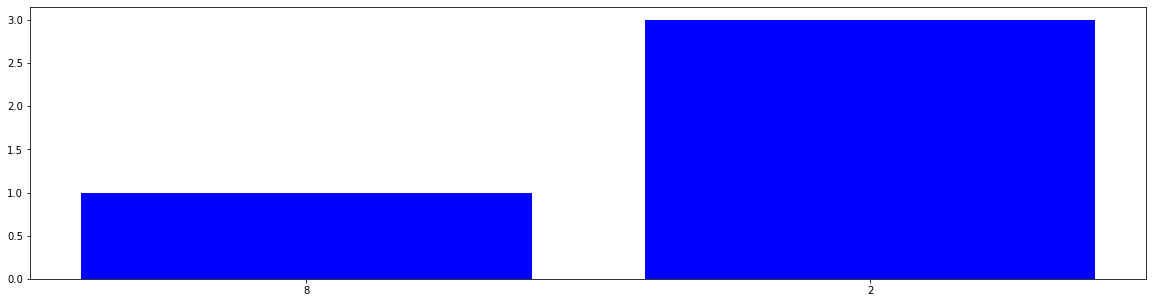

In [34]:
plot_communities_dimentions(labelprop_tuple)

In [35]:
results = pquality.pquality_summary(G, labelprop_tuple)
results['Indexes']

,min,max,avg,std
Index,,,,
Internal Density,0.321429,1.000000,0.830357,0.293830
Edges inside,1.000000,9.000000,3.000000,3.464102
Average Degree,1.000000,2.250000,1.312500,0.541266
FOMD,0.000000,0.250000,0.062500,0.108253
TPR,0.000000,0.000000,0.000000,0.000000
Expansion,0.750000,1.000000,0.937500,0.108253
Cut Ratio,0.083333,0.125000,0.093750,0.018042
Conductance,0.250000,0.500000,0.437500,0.108253
Normalized Cut,0.500000,0.555556,0.541667,0.024056


In [36]:
results['Modularity']

,value
Index,
Modularity (no overlap),0.185185


In [37]:
eps = ensemble.Parameter(name="epsilon", start=0.1, end=0.6, step=0.1)
size = ensemble.Parameter(name="min_com_size", start=3, end=5,step=1)

In [38]:
coms_demon, scoring = ensemble.random_search(graph=G, method=algorithms.demon,
                                                       parameters=[eps, size],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                        aggregate=max)

print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(coms_demon.communities, coms_demon.method_parameters, scoring))

Communities:
 [] 
Configuration: {'epsilon': 0.30000000000000004, 'min_com_size': 3} 
Scoring: FitnessResult(min=None, max=None, score=0.0, std=None)


In [17]:
print(print_bold_str("Average Internal Degree:"), coms_demon.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), coms_demon.internal_edge_density())
print(print_bold_str("Conductance:"), coms_demon.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), coms_demon.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), coms_demon.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), coms_demon.modularity_density())
print(print_bold_str("Z Modularity:"), coms_demon.z_modularity())

NameError: name 'coms_demon' is not defined

In [42]:
print(print_bold_str("N_Community:"), len(coms_demon.communities))

max_com_len = 0
for com in coms_demon.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)  

N_Community: 0
Max_Dim_Community: 0


In [43]:
with open(community_path+'demon.pickle', 'wb') as f:
    pickle.dump(coms_demon, f)

In [44]:
demon_tuple = [tuple(x) for x in coms_demon.communities]

In [45]:
print("Numero di communities: ", len(demon_tuple))

Numero di communities:  0


{}


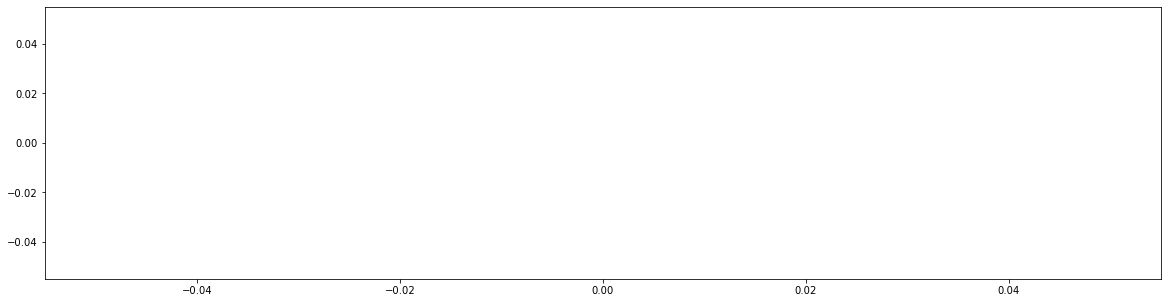

In [92]:
plot_communities_dimentions(demon_tuple)

In [47]:
results = pquality.pquality_summary(G, demon_tuple)
results['Indexes']

ValueError: min() arg is an empty sequence

In [ ]:
results['Modularity']

# 4 - GM

In [ ]:
GM_coms = algorithms.greedy_modularity(G, weight = "Count") 

In [ ]:
print(print_bold_str("Average Internal Degree:"), GM_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), GM_coms.internal_edge_density())
print(print_bold_str("Conductance:"), GM_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), GM_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), GM_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), GM_coms.modularity_density())
print(print_bold_str("Z Modularity:"), GM_coms.z_modularity())

In [ ]:
print(print_bold_str("N_Community:"), len(GM_coms.communities))

max_com_len = 0
for com in GM_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)  

In [ ]:
with open(community_path+'GM.pickle', 'wb') as f:
    pickle.dump(GM_coms, f)

In [ ]:
GM_tuple = [tuple(x) for x in GM_coms.communities]

In [ ]:
plot_communities_dimentions(GM_tuple)

In [ ]:
results = pquality.pquality_summary(G, GM_tuple)
results['Indexes']

In [ ]:
results['Modularity']

# 5 - CONFRONTI

1) Lettura

In [72]:
with open(community_path+'louvain.pickle', 'rb') as f:
    louvain_coms = pickle.load(f)
with open(community_path+'labelprop.pickle', 'rb') as f:
    labelprop_coms = pickle.load(f)
with open(community_path+'demon.pickle', 'rb') as f:
    demon_coms = pickle.load(f)
with open(community_path+'GM.pickle', 'rb') as f:
    GM_coms = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../Dataset FFF/Community_task/GM.pickle'

In [ ]:
def covg_overlap(G, community, name):
    print(f'{name} coverage:', community.node_coverage)
    print(f'{name} overlap:', community.overlap) 
    print(f'{name} avg degree:', evaluation.average_internal_degree(G, community))
    print("*******")

In [ ]:
covg_overlap(G, louvain_coms, "Louvain")
covg_overlap(G, labelprop_coms, "LabelPropagation")
covg_overlap(G, demon_coms, "Demon")
covg_overlap(G, GM_coms, "GM")

2) Confronti

2.1) Size BoxPlot

In [ ]:
plot_list = [ np.array(evaluation.size(G,louvain_coms, summary=False)), 
             np.array(evaluation.size(G,labelprop_coms, summary=False)),
             np.array(evaluation.size(G,demon_coms, summary=False)),
             np.array(evaluation.size(G,GM_coms, summary=False))]
labels = ["Louvain", "Label Propagation", "Demon", "GM"]

fig = plt.figure(figsize=(16,8), dpi= 300)
ax = fig.add_subplot(111)
plt.boxplot(plot_list,labels=labels)
#plt.boxplot(x)

fontsize = 15

#plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
plt.yticks(fontsize=fontsize, alpha=1)
plt.xticks(fontsize=fontsize, alpha=1)
plt.xlabel('Algorithms', fontsize=fontsize)
plt.ylabel("Size", fontsize=fontsize)
plt.title(" Size Box Plot", fontsize=fontsize)
#plt.title(name + " in 24 hours", fontsize=fontsize)
plt.grid(axis='both', alpha=.3)
plt.yscale("log")



# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

In [ ]:
edge_density_ = [(np.array(evaluation.size(G,labelprop_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)),
                               "Label Propagation"),
                               (np.array(evaluation.size(G,demon_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                                "Demon")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

In [ ]:
edge_density_= [(np.array(evaluation.size(G,louvain_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,louvain_coms, summary=False)),
                               "Louvain"),
                               (np.array(evaluation.size(G,demon_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                                "Demon")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

In [ ]:
edge_density_= [(np.array(evaluation.size(G,louvain_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,louvain_coms, summary=False)),
                               "Louvain"),
                               (np.array(evaluation.size(G,GM_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,GM_coms, summary=False)),
                                "GM")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

In [ ]:
edge_density_= [(np.array(evaluation.size(G,demon_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                               "Demon"),
                               (np.array(evaluation.size(G,GM_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,GM_coms, summary=False)),
                                "GM")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

In [ ]:
edge_density_= [(np.array(evaluation.size(G,demon_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,demon_coms, summary=False)),
                               "Demon"),
                               (np.array(evaluation.size(G,GM_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,GM_coms, summary=False)),
                                "GM")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

In [ ]:
edge_density_ = [(np.array(evaluation.size(G,labelprop_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)),
                               "Label Propagation"),
                               (np.array(evaluation.size(G,louvain_coms, summary=False)), 
                                np.array(evaluation.edges_inside(G,louvain_coms, summary=False)),
                                "Louvain")]
scatter_plot(edge_density_, "Internal Edge Density vs Size")

In [ ]:
plot_list = [ np.array(evaluation.size(G,louvain_coms, summary=False)), 
             np.array(evaluation.size(G,labelprop_coms, summary=False)),
             np.array(evaluation.size(G,demon_coms, summary=False)),
             np.array(evaluation.size(G,GM_coms, summary=False))]

In [ ]:
(np.array(evaluation.size(G,labelprop_coms, summary=False)), 
                               np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)),

In [ ]:
edge_density_all= [(np.array(evaluation.size(G,labelprop_coms, summary=False)), np.array(evaluation.edges_inside(G,labelprop_coms, summary=False)), "Label Propagation"),
                       (np.array(evaluation.size(G,louvain_coms, summary=False)), np.array(evaluation.edges_inside(G,louvain_coms, summary=False)), "Louvain"),
                      (np.array(evaluation.size(G,demon_coms, summary=False)), np.array(evaluation.edges_inside(G,demon_coms, summary=False)), "Demon"),
                       (np.array(evaluation.size(G,GM_coms, summary=False)), np.array(evaluation.edges_inside(G,GM_coms, summary=False)), "GM"),]

In [ ]:
scatter_plot(edge_density_all, "Internal Edge Density vs Size")

In [ ]:
avg_deg_all= [(np.array(evaluation.size(G,labelprop_coms, summary=False)), np.array(evaluation.average_internal_degree(G,labelprop_coms, summary=False)), "Label Propagation"),
                       (np.array(evaluation.size(G,louvain_coms, summary=False)), np.array(evaluation.average_internal_degree(G,louvain_coms, summary=False)), "Louvain"),
                      (np.array(evaluation.size(G,demon_coms, summary=False)), np.array(evaluation.average_internal_degree(G,demon_coms, summary=False)), "Demon"),
                       (np.array(evaluation.size(G,GM_coms, summary=False)), np.array(evaluation.average_internal_degree(G,GM_coms, summary=False)), "GM"),]
scatter_plot(avg_deg_all, "Average Internal Degree vs Size")

3) Comparison NMI, NF1

In [ ]:
#Non di Demon (e in caso di Kclique se si riesce a fare) perchè non copre tutto il dataset ed è overlapping
def comparison_NMI(coms1, coms2, name):
    print(f"{name}: ",evaluation.normalized_mutual_information(coms1, coms2))  
    print("********")

In [ ]:
def comparison_NF1(coms1, coms2, name):
    print(f"{name}: ",evaluation.nf1(coms1, coms2))
    coms1_tuple = [tuple(x) for x in coms1.communities]
    coms2_tuple = [tuple(x) for x in coms2.communities]
    nf = NF1(coms1_tuple,coms2_tuple)
    results = nf.summary()
    print(results['scores'])
    print(results['details'])
    nf.plot(title=f'{name}')
    print("*********")

NMI

In [ ]:
comparison_NMI(louvain_coms, labelprop_coms, "Louvain vs Label")
comparison_NMI(GM_coms, labelprop_coms, "GM vs Label")
comparison_NMI(louvain_coms, GM_coms, "Louvain vs GM")

In [ ]:
NF1

In [ ]:
comparison_NF1(louvain_coms, labelprop_coms, "Louvain vs Label Propagation")
comparison_NF1(GM_coms, labelprop_coms, "GM vs Label")
comparison_NF1(louvain_coms, GM_coms, "Louvain vs GM")

comparison_NF1(louvain_coms, demon_coms, "Louvain vs Demon")
comparison_NF1(GM_coms, demon_coms, "GM vs Demon")
comparison_NF1(labelprop_coms, demon_coms, "Label Propagation vs Demon")

In [ ]:
viz.plot_com_stat([demon_coms, louvain_coms], evaluation.internal_edge_density)

In [ ]:
viz.plot_com_stat([labelprop_coms, louvain_coms], evaluation.internal_edge_density)

In [ ]:
viz.plot_com_stat([labelprop_coms, demon_coms], evaluation.internal_edge_density)

In [ ]:
viz.plot_com_stat([GM_coms, demon_coms], evaluation.internal_edge_density)

In [ ]:
viz.plot_com_stat([labelprop_coms, GM_coms], evaluation.internal_edge_density)

In [ ]:
viz.plot_com_stat([GM_coms, louvain_coms], evaluation.internal_edge_density)

# 6 - Prova Kcliques

In [63]:
import random
k = 8500
sampled_nodes = random.sample(G.nodes, k)
sampled_graph = G.subgraph(sampled_nodes)
k_num = ensemble.Parameter(name="k", start=2, end=8, step=1)

k_coms, scoring = ensemble.random_search(graph=sampled_graph, method=algorithms.kclique,
                                                       parameters=[k_num],
                                                       quality_score=evaluation.newman_girvan_modularity,
                                                       instances=3, aggregate=max)

ValueError: Sample larger than population or is negative

In [ ]:
with open(community_path+'k.pickle', 'wb') as f:
    pickle.dump(k_coms, f)

In [ ]:
with open(community_path+'k.pickle', 'rb') as f:
    k_coms = pickle.load(f)

In [ ]:
print(print_bold_str("Average Internal Degree:"), k_coms.average_internal_degree())
print(print_bold_str("Internal Edge Density:"), k_coms.internal_edge_density())
print(print_bold_str("Conductance:"), k_coms.conductance())
print(print_bold_str("Erdos Renyi Modularity:"), k_coms.erdos_renyi_modularity())
print(print_bold_str("Newman Girvan Modularity:"), k_coms.newman_girvan_modularity())
print(print_bold_str("Modularity Density:"), k_coms.modularity_density())
print(print_bold_str("Z Modularity:"), k_coms.z_modularity())

In [ ]:
print(print_bold_str("N_Community:"), len(k_coms.communities))

max_com_len = 0
for com in k_coms.communities:
    if len(com) > max_com_len:
        max_com_len = len(com)
print(print_bold_str("Max_Dim_Community:"), max_com_len)  

In [ ]:
k_tuple = [tuple(x) for x in k_coms.communities]

In [ ]:
plot_communities_dimentions(k_tuple)

In [ ]:
covg_overlap(sampled_graph, k_coms, "K-Cliques")

# 7 - Analisi delle communities di Louvain

1) Prova edit distance con supervisione tag

In [48]:
from collections import Counter
from wordcloud import WordCloud

In [49]:
saved_path2 = "../Dataset FFF/nodes_tagged.csv"

In [50]:
tagged_dg = pd.read_csv(saved_path2)

In [51]:
s_tag = tagged_dg[tagged_dg["Named"]!="unamed"][["Id", "Named"]]
s_tag

,Id,Named
0,fridaysforfuture,#FridayForFuture
1,climatestrike,Action
2,climateaction,Action
3,climatecrisis,#FridayForFuture
4,climateemergency,#FridayForFuture
...,...,...
18842,orwell,German politics
18847,strajkdlaklimatu,FFF DE
18858,fridaysforfuturemexico,#FridayForFuture
18868,globalclimatestrikeindia,Action


In [52]:
def edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

In [53]:
dd = {}

In [54]:
categories_list = []
for s in louvain_coms.communities[1]:
    category = ""
    maxmax_ = 30
    for n in set(s_tag["Named"]):
        to_check = list(s_tag[s_tag["Named"]==n]["Id"])
        max_ = 30
        for ss in to_check:
            edit = edit_distance(s, ss)
            if  edit < max_:
                max_ = edit
        if max_ < maxmax_:
            maxmax_ = max_
            category = n
    categories_list.append(category)

In [55]:
new_new_df = pd.DataFrame({"Com_1": categories_list})
new_new_df.to_csv(community_path + "Com_1.csv", index=False)

In [56]:
dd[1]=categories_list

In [57]:
dd[1]

['German politics', 'Material', 'Material', 'German politics']

In [60]:
import matplotlib.pyplot as pyplot

for i in range(2):
    all_string = ""
    for s in dd[i]:
        all_string = all_string + s + "_"
    word_could_dict=Counter(all_string.split("_"))
    pyplot.pie([float(v) for v in word_could_dict.values()], labels=[k for k in word_could_dict],
           autopct=None)
    pyplot.show()

KeyError: 0

2) Prova word cloud

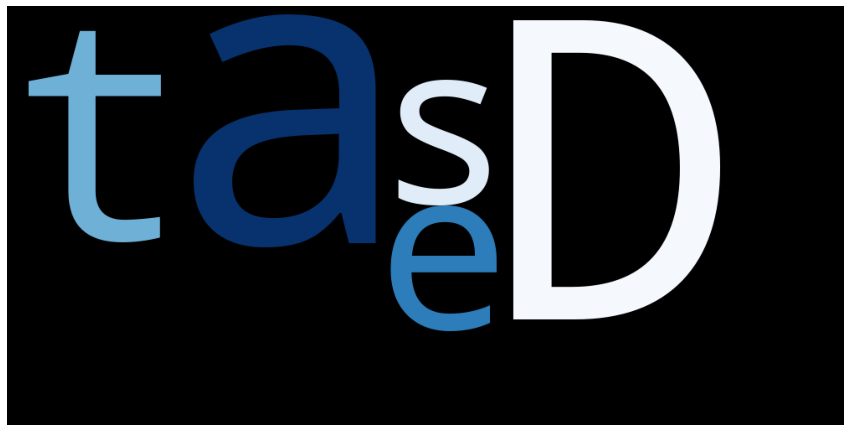

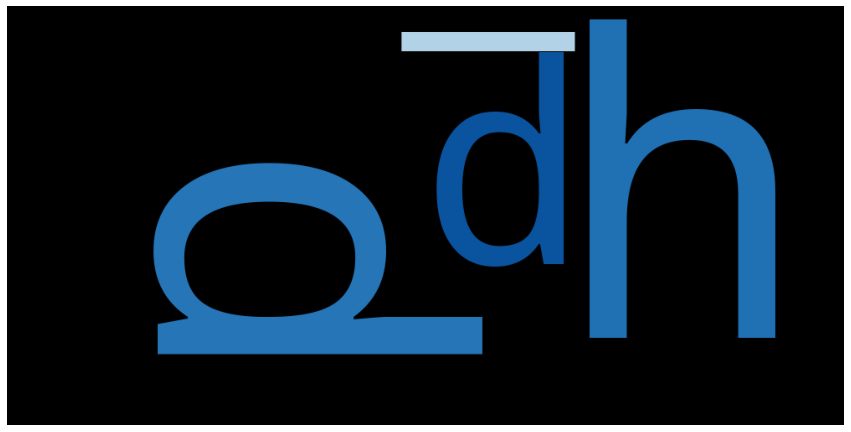

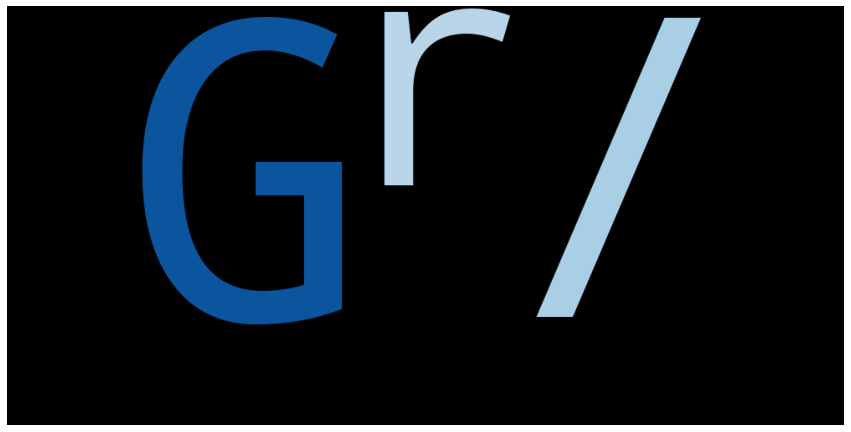

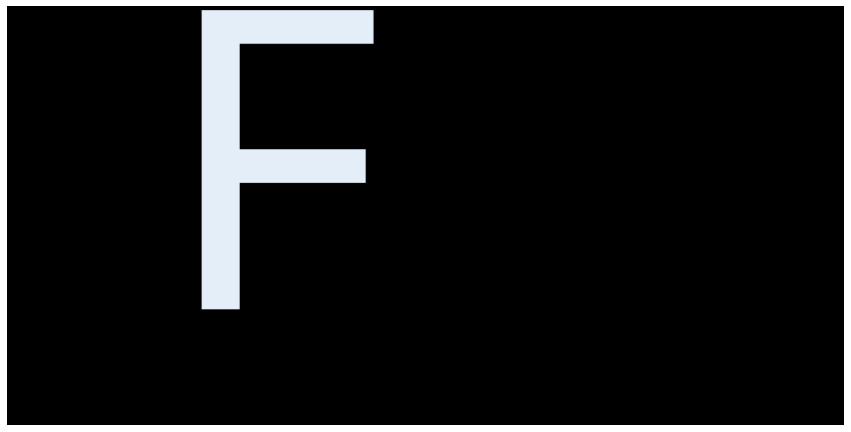

In [61]:
for i in louvain_coms.communities[:16]:
    all_string = ""
    for s in i:
        all_string = all_string + s + " "
    word_could_dict=Counter(all_string.split())
    wordcloud = WordCloud(width = 1000, height = 500 , colormap="Blues").generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.close()

In [ ]:
#0: react, node, frontend
#1: python, julia, learning
#2: C development
#3: version control
#4: deployment

# Analisi delle community Demon

In [62]:
for i in demon_coms.communities[:6]:
    all_string = ""
    for s in i:
        all_string = all_string + s + " "
    
    word_could_dict=Counter(all_string.split())
    """
    wordcloud = WordCloud(width = 1000, height = 500 , colormap="Blues").generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.close()
    """
    
    # makes the circle using numpy
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    # Generate a word cloud of document
    wordcloud = WordCloud(mask=mask, contour_width=0.1, colormap="Blues").generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    #Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

NameError: name 'demon_coms' is not defined